# Training Robust Models

This notebook focuses on **general techniques** for ensuring that our machine learning models are "well-tuned."

## Normalizing and Regularizing Data

Out of the machine learning methods covered in this course, the majority are **not scale-invariant**, meaning that they will give different results if the values of a given feature are scaled up or down by multiplying by some constant factor.

This is true for:
* PCA
* k-Means clustering
* Linear and logistic regression with ridge or elastic net
* Neural networks

On the other hand, two families of methods are in fact *scale-invariant*:
* Decision trees and random forests
* Linear and logistic regression **without** regularization

Let's start by looking at how to normalize or regularize data, for those methods that aren't scale-invariant.

Let's start with an example we used for dimensionality reduction.

Our dataset (also used in the Machine Learning lecture notebook) is about types of glass -- useful in criminology where we may need to identify a glass shard by its purpose.  This dataset comes from the UC Irvine Machine Learning Repository; it was created by B. German in Britain's Home Office Forensic Science Service and donated by Dr. Vina Spiehler of Diagnostic Products Corporation.  You can read more about it at:

https://archive.ics.uci.edu/ml/datasets/glass+identification


In [98]:
!pip install googledrivedownloader

In [0]:
from google_drive_downloader import GoogleDriveDownloader as gdd

# Glass data from https://archive.ics.uci.edu/ml/machine-learning-databases/glass/
gdd.download_file_from_google_drive(file_id='1b1C1AlZmqada3ncYWVqJd8zQIWphOo_K',
                                    dest_path='/content/glass.csv')

In [100]:
# Load into a dataframe, with the header in row 0
import pandas as pd

glass_df = pd.read_csv('glass.csv', header=[0])

glass_df

,ID,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [101]:
# Remove the ID and the Type labels for the training data
X_df = glass_df.drop(['ID','Type'], axis=1)

# Labels
y = glass_df['Type']

# Let's see the data
X_df

,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


We'll try it now **without** scaling.

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
X2 = pca.fit_transform(X_df)

# Let's see the components
pca.components_

array([[ 9.28126899e-04,  1.72248332e-02, -7.23534913e-01,
         4.63352227e-02, -7.69381480e-03, -7.84042855e-02,
         6.79716799e-01,  7.63580112e-02,  9.05695250e-04],
       [-1.52290883e-03,  3.98797552e-01, -5.43050989e-01,
         2.58840747e-01,  1.94092491e-01,  1.03826640e-01,
        -6.16724638e-01,  2.23545134e-01, -1.67842645e-02],
       [-1.37689385e-03, -6.54934730e-01, -1.31198879e-01,
         5.56521411e-02,  6.91951335e-01,  2.18565071e-01,
        -7.87784202e-02, -1.33876425e-01,  7.21253225e-03],
       [ 3.10643441e-04, -3.46599960e-01, -9.86931157e-02,
         2.70893633e-01, -5.70087029e-01,  6.77700643e-01,
        -5.39461282e-02,  9.71284426e-02,  1.10986100e-02],
       [ 7.12950233e-04, -3.98381798e-01,  7.68490459e-02,
         3.13525755e-01, -1.03320001e-01, -5.08016303e-01,
        -6.57426026e-02,  6.80657156e-01,  2.67473294e-02],
       [ 1.82174928e-03, -1.55680962e-02, -4.77602532e-02,
        -7.80387063e-01,  6.02933593e-02,  2.651873

In [103]:
pca.explained_variance_ratio_

array([4.76205247e-01, 2.63192760e-01, 1.07800432e-01, 1.02024637e-01,
       3.30672372e-02, 1.60477360e-02, 1.42743130e-03, 2.34365001e-04,
       1.53917702e-07])

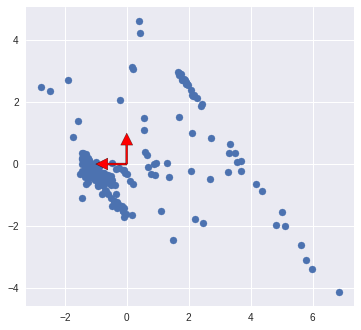

In [104]:
# Visualization code based on 
# https://stackoverflow.com/questions/18299523/basic-example-for-pca-with-matplotlib
import numpy as np
import matplotlib.pyplot as plt


# Let's take our first two dimensions, as before
data = X2[:, 0:2]

mu = data.mean(axis=0)
data = (data - mu)/data.std(axis=0)
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()

fig, ax = plt.subplots()
ax.scatter(X2[:,0], X2[:,1])
for axis in eigenvectors:
    start, end = mu, mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.show()

Normally we should *standardize* the data before running PCA...

In [105]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features with stdev 1
X2 = StandardScaler().fit_transform(X_df)

pca = PCA(n_components=9)
X2 = pca.fit_transform(X2)

# Let's see the components
pca.components_

array([[ 0.54517662, -0.2581256 ,  0.11088095, -0.42870863, -0.22883635,
        -0.21934405,  0.49230609, -0.25037512,  0.18584154],
       [ 0.28568318,  0.27035007, -0.59355826,  0.29521154, -0.15509891,
        -0.15397013,  0.3453798 ,  0.48470218, -0.06203879],
       [ 0.08691083, -0.38491962,  0.00841796,  0.32923712, -0.45870884,
         0.66257412, -0.00098473,  0.07405473,  0.28445055],
       [ 0.14738099,  0.49124204,  0.37878577, -0.13750592, -0.65253771,
        -0.03853544, -0.27644322,  0.13317545, -0.23049202],
       [-0.0735427 ,  0.1536833 ,  0.12350912,  0.01410888,  0.00850012,
        -0.30703984, -0.18818774,  0.25133426,  0.87326405],
       [ 0.11528772, -0.55811757,  0.30818598, -0.01885731,  0.08609797,
        -0.24363237, -0.14866937,  0.65721884, -0.24304431],
       [ 0.08186724,  0.14858006, -0.20604537, -0.69923557,  0.21606658,
         0.50412141, -0.09913463,  0.35178255,  0.07372136],
       [-0.7522159 , -0.12769315, -0.07689061, -0.27444105, -0

In [106]:
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

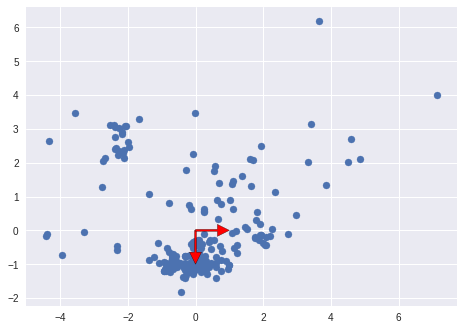

In [107]:
# Visualization code based on 
# https://stackoverflow.com/questions/18299523/basic-example-for-pca-with-matplotlib
import numpy as np

# Let's take our first two dimensions, as before
data = X2[:, 0:2]

mu = data.mean(axis=0)
data = (data - mu)/data.std(axis=0)
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()

fig, ax = plt.subplots()
ax.scatter(X2[:,0], X2[:,1])
for axis in eigenvectors:
    start, end = mu, mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.show()

Generally speaking, it does not make sense to **normalize** the data between 0-1 for PCA, but it may make sense to do this for classifiers.  The SciKit-Learn class for this is `MinMaxScaler` instead of `StandardScaler`.

## Value Imputation

Sometimes we want to fill in missing values.

In [108]:
X_df

,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


### Test and Training Data

Let's split into training and test sets!

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, \
                                                    test_size=0.3,\
                                                    random_state=42)


In [110]:
X_train

,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe
137,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.00
65,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.00,0.00
108,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.00,0.08
181,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.00
31,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00
...,...,...,...,...,...,...,...,...,...
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
14,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00
92,1.51588,13.12,3.41,1.58,73.26,0.07,8.39,0.00,0.19
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00


In [111]:
# Note that there are no items of Class 4!
set(y)

{1, 2, 3, 5, 6, 7}

Let's do a logistic regression on the initial data.  This is a multi-class classification problem, with 7 different classes.  Not too surprisingly, the score isn't fantastic.

In [112]:
clf = LogisticRegression(penalty='l2', random_state=42,\
                                             max_iter=5000)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.676923076923077

### Missing Data and Imputation

Now let's see what happens if we randomly drop some of the data!

In [113]:
import random

X_missing = X_train.copy()

for index,row in X_train.iterrows():
  col = random.randint(0,8)
  if col < 8:
    X_missing.loc[index,X_df.columns[col]] = np.NaN

X_missing

,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe
137,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.00
65,1.52099,13.69,3.59,NaN,71.96,0.09,9.40,0.00,0.00
108,1.52222,NaN,0.00,1.00,72.67,0.10,11.52,0.00,0.08
181,NaN,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.00
31,NaN,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00
...,...,...,...,...,...,...,...,...,...
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
14,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,NaN,0.00
92,1.51588,NaN,3.41,1.58,73.26,0.07,8.39,0.00,0.19
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,NaN,0.00


In [114]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
imp.fit(X_missing)
X_imputed = imp.transform(X_missing)

clf.fit(X_imputed, y_train)

clf.score(X_test, y_test)

0.6307692307692307

We can see this is worse than, but still fairly similar to, the results we get with complete data.  Our imputation was **somewhat** effective....

## k-Fold Cross Validation 

Previously we built a regression model using a 70/30 split.  Given the limited number of training examples, there is a fair chance it overfit the data, and that in practice it would not perform as well as was predicted.

We can try k-fold cross-validation for this.  In reality our dataset is skewed among the class labels, e.g., it only has 9 samples in some of the classes -- so we will see this does not perform especially well.  Nonetheless k-fold cross-validation is extremely effective in many other scenarios!

In [115]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=clf, X=X_df,y=y, cv=9)

print('Cross-validation accuracy scores: %s' %scores)
print('Cross-validation accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Cross-validation accuracy scores: [0.625      0.54166667 0.70833333 0.625      0.5        0.58333333
 0.45833333 0.65217391 0.73913043]
Cross-validation accuracy: 0.604 +/- 0.087


## Learning Curves

Let's go back to our glass data set... How big of a training set should we use?

In [116]:
from sklearn.model_selection import learning_curve

# Remove the ID and the Type labels for the training data
X = glass_df.drop(['ID','Type'], axis=1)

# Labels
y = glass_df['Type']

# Now let's ONLY recognize label 1
#y = y.apply(lambda x: x == 1)

scl = StandardScaler().fit(X)
X = scl.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                    test_size=0.5,\
                                                    random_state=42)

X_tr = X_train.copy()

clf = LogisticRegression(penalty='l2', random_state=42)

train_sizes, train_scores, test_scores = \
  learning_curve(estimator=clf,
                 X=X_tr,
                 y=y_train,
                 train_sizes=[0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 1],
                 cv=5,
                 n_jobs=1)
  

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


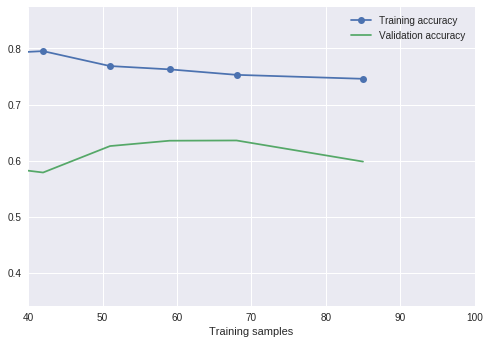

In [117]:
plt.style.use('seaborn')

plt.plot(train_sizes,np.mean(train_scores, axis=1), marker='o', label='Training accuracy')
plt.plot(train_sizes,np.mean(test_scores, axis=1), marker='+', label='Validation accuracy')
plt.xlabel('Training samples')
plt.xlim(40,100)
plt.legend()

It looks like validation accuracy tapers off at ~82 training examples.

In [130]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

param_range = np.logspace(-5, 3, 5)

train_scores, test_scores = \
  validation_curve(LogisticRegression(penalty='l2', random_state=42,\
                                             max_iter=5000),
                 X_tr,
                 y_train,
                 "C",
                 param_range,
                 cv=5)
  
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


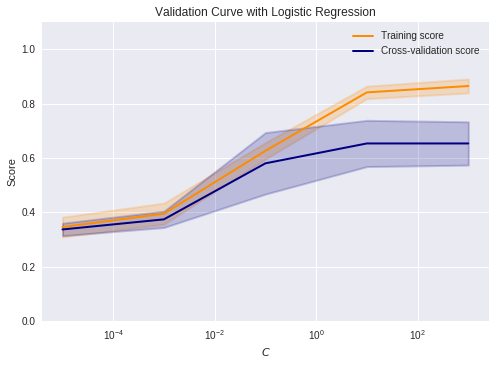

In [132]:
# Plot this.  Plotting code is
# based on https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html



plt.title("Validation Curve with Logistic Regression")
plt.xlabel(r"$C$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Confusion Matrices

We have built a multi-class classifier in this notebook.  For simplicity, let's consider a **confusion matrix** between two classes.

In [120]:
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(penalty='l2', random_state=42,\
                                             max_iter=5000)
clf.fit(X_tr, y_train)
y_pred = clf.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred,\
                           labels=[1,2])

print(confmat)

[[23 10]
 [12 28]]


In [121]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' %precision_score(y_true=y_test, y_pred=y_pred, labels=[1,2],average='micro'))
print('Recall: %.3f' %recall_score(y_true=y_test, y_pred=y_pred, labels=[1,2],average='micro'))
print('F1: %.3f' %f1_score(y_true=y_test, y_pred=y_pred, labels=[1,2],average='micro'))

Precision: 0.622
Recall: 0.662
F1: 0.642


In [122]:
from sklearn.metrics import roc_curve, auc

y_score = clf.fit(X_train, y_train).decision_function(X_test)

y_score

array([[ 2.28405104e+00,  2.07454714e+00,  5.12628726e-01,
        -1.20173153e+00, -1.97226432e+00, -1.69723105e+00],
       [-4.71598290e+00,  5.04767487e-01, -3.88450324e+00,
         8.80145925e-01,  2.05225738e+00,  5.16331534e+00],
       [ 3.65853052e+00,  2.47539270e+00,  1.55673059e+00,
        -2.88057124e+00, -1.71929320e+00, -3.09078936e+00],
       [-4.80061420e+00,  7.54019542e-01, -3.48284370e+00,
         9.96690747e-01,  1.75647874e+00,  4.77626887e+00],
       [-3.54613520e-02,  1.98778189e+00,  3.90004590e-01,
        -5.42120744e-01, -1.42421805e+00, -3.75986338e-01],
       [ 1.04692718e+00,  2.42706771e+00, -1.09037925e+00,
         7.33096102e-01, -4.54416717e-01, -2.66229502e+00],
       [ 2.55578738e+00,  1.52035104e+00,  4.78008414e-01,
        -1.58326805e+00, -1.44430892e+00, -1.52656986e+00],
       [ 1.33529195e+00,  1.36006973e+00,  5.77454435e-01,
        -1.42538732e+00, -6.11111044e-01, -1.23631775e+00],
       [ 1.43756992e+00,  1.62226523e+00,  4.931

In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_2 = label_binarize(y_test, classes=[1,2,3,4,5,6,7])

# We need to delete the 4th feature 
y_test_2 = np.delete(y_test_2, 3, axis=1)

In [0]:
n_classes = y_test_2.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_2.ravel(), y_score.ravel(), pos_label=1)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

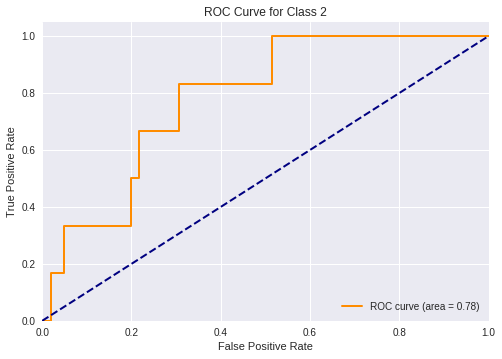

In [134]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class 2')
plt.legend(loc="lower right")
plt.show()